In [3]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 고해상도 디스플레이 설정
%config InlineBackend.figure_format = 'retina'
# 폰트를 'Malgun Gothic'으로 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 마이너스 부호 깨짐 현상 해결
plt.rcParams["axes.unicode_minus"] = False

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# Seaborn 시각화 패키지 임포트
import seaborn as sns
sns.set(font="Malgun Gothic",             # 폰트 설정
        rc={"axes.unicode_minus":False},  # 마이너스 부호 깨짐 현상 방지
        style="darkgrid")                 # 테마

In [5]:
df = pd.read_excel('마을방송무선국.xlsx')

# 연도별 허가건수 시각화

In [76]:
data = df.groupby(by = ['허가연도'], as_index=False)[['허가번호']].count()
data.rename(columns={'허가번호' : '무선국 허가건수'}, inplace=True)

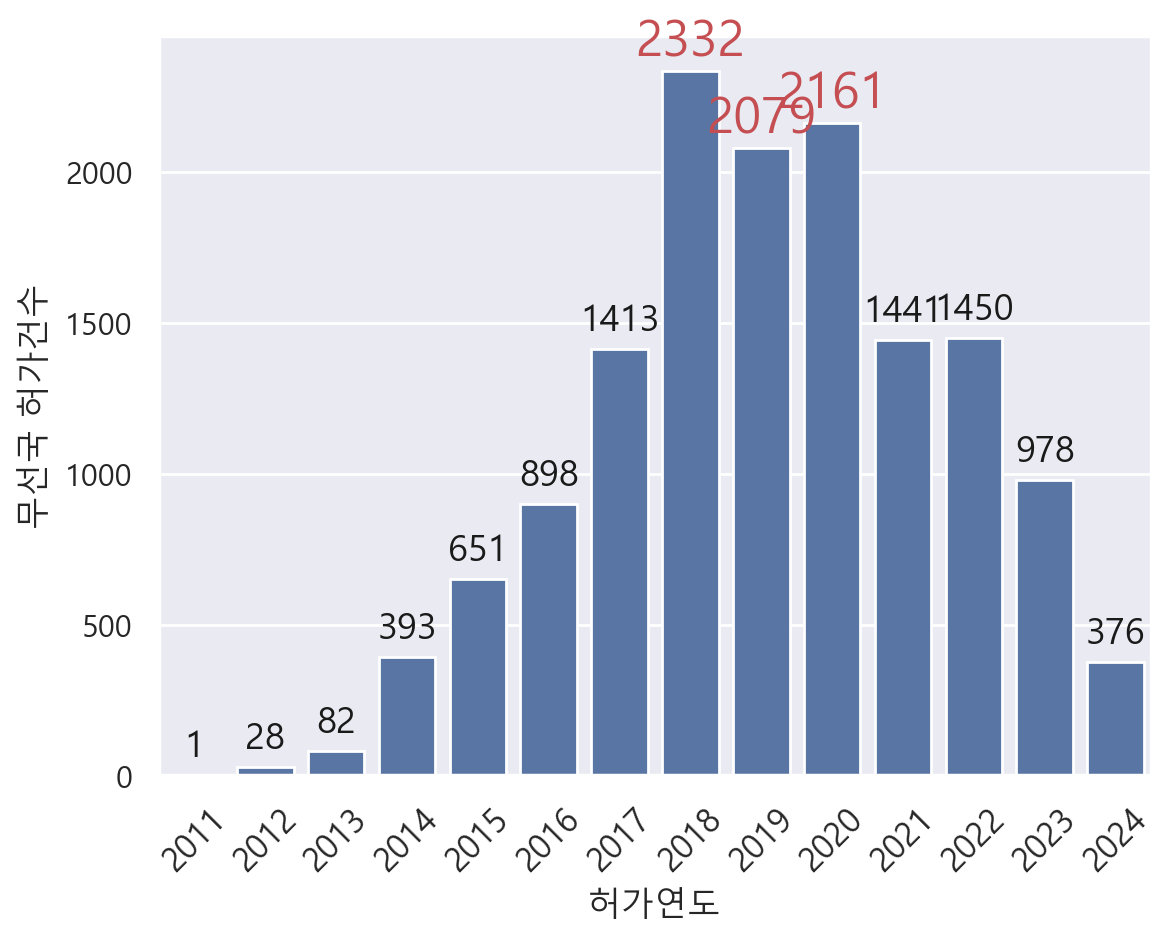

In [110]:
# 막대그래프 생성
ax = sns.barplot(data = data,
                x= "허가연도",
                y= "무선국 허가건수")

# 막대 위 수치를 보여줌
for idx, p in enumerate(ax.patches) :
    
    # 제일 큰 수치는 붉은색, 20point 로 표시
    if idx in [7, 8, 9]: # 제일 큰 수치의 인덱스
        ax.annotate("%.0f" % p.get_height(),    # 텍스트
                    (p.get_x() + p.get_width()/2, p.get_height()), # xy, 텍스트 표시 위치
                    ha='center', va='center',   # 텍스트 정렬
                    fontsize=18, color='r',     # 글자크기, 색깔
                    xytext=(0, 10),             # 텍스트가 출력될 위치
                    textcoords='offset points') # 해당 위치가 어떤 좌표계를 따르는지를 지정
        
    # 다른 수치는 검정색, 15point 로 표시
    else : 
        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=13, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
        
# X축 글자크기 12, 45도 회전
plt.xticks(fontsize=12, rotation=45)
# png파일로 저장
plt.savefig('연도별허가건수.png', dpi = 400, bbox_inches='tight')
plt.show()

# 전파형식코드별 무선국 개수 시각화

In [7]:
data1 = df.groupby(by = ['전파형식코드'], as_index=False)[['허가번호']].count()
data1.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
data1 = data1.sort_values(by = '무선국 개수', ascending = False)

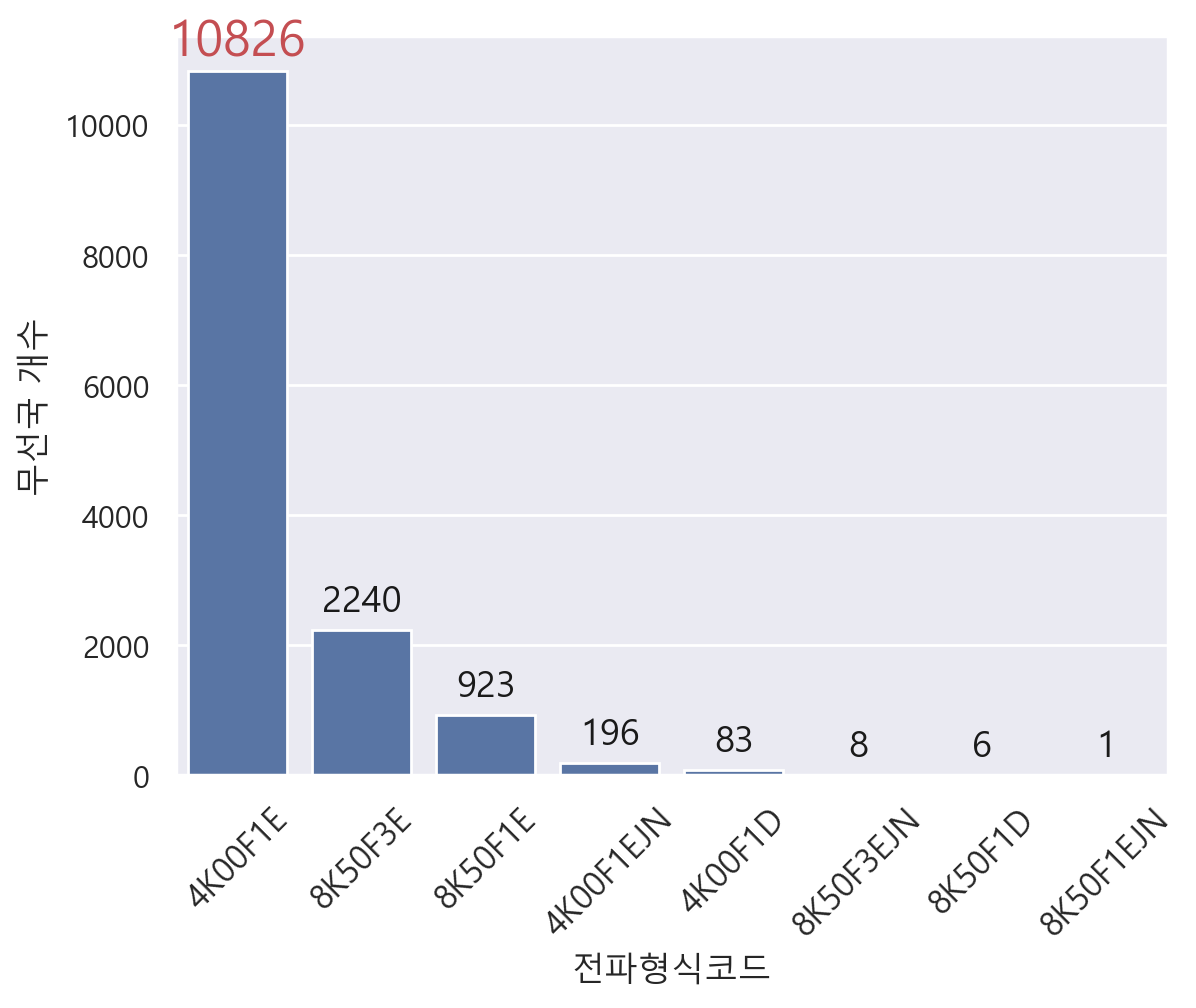

In [82]:
# 막대그래프 생성
ax = sns.barplot(data = data1,
                x= "전파형식코드",
                y= "무선국 개수")

# 막대 위 수치를 보여줌
for idx, p in enumerate(ax.patches) :
    
    # 제일 큰 수치는 붉은색, 20point 로 표시
    if idx == 0: # 제일 큰 수치의 인덱스
        ax.annotate("%.0f" % p.get_height(),    # 텍스트
                    (p.get_x() + p.get_width()/2, p.get_height()), # xy, 텍스트 표시 위치
                    ha='center', va='center',   # 텍스트 정렬
                    fontsize=18, color='r',     # 글자크기, 색깔
                    xytext=(0, 10),             # 텍스트가 출력될 위치
                    textcoords='offset points') # 해당 위치가 어떤 좌표계를 따르는지를 지정
        
    # 다른 수치는 검정색, 15point 로 표시
    else : 
        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=13, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
        
# X축 글자크기 12, 45도 회전
plt.xticks(fontsize=12, rotation=45)
# png파일로 저장
plt.savefig('전파형식코드개수.png', dpi = 400, bbox_inches='tight')
plt.show()

In [11]:
data1

,전파형식코드,무선국 개수
1,4K00F1E,10826
6,8K50F3E,2240
4,8K50F1E,923
2,4K00F1EJN,196
0,4K00F1D,83
7,8K50F3EJN,8
3,8K50F1D,6
5,8K50F1EJN,1


# 주파수별 무선국 개수 시각화
### (범주형이라서 밀도차트가 안먹힘)

## 421.98MHz ~ 424MHz : 
### '주파수공용방식의 간이무선국'에 분배된주파수

In [37]:
data2 = df.groupby(by = ['주파수'], as_index=False)[['허가번호']].count()
data2.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
data2 = data2.sort_values(by = '주파수', ascending = True)

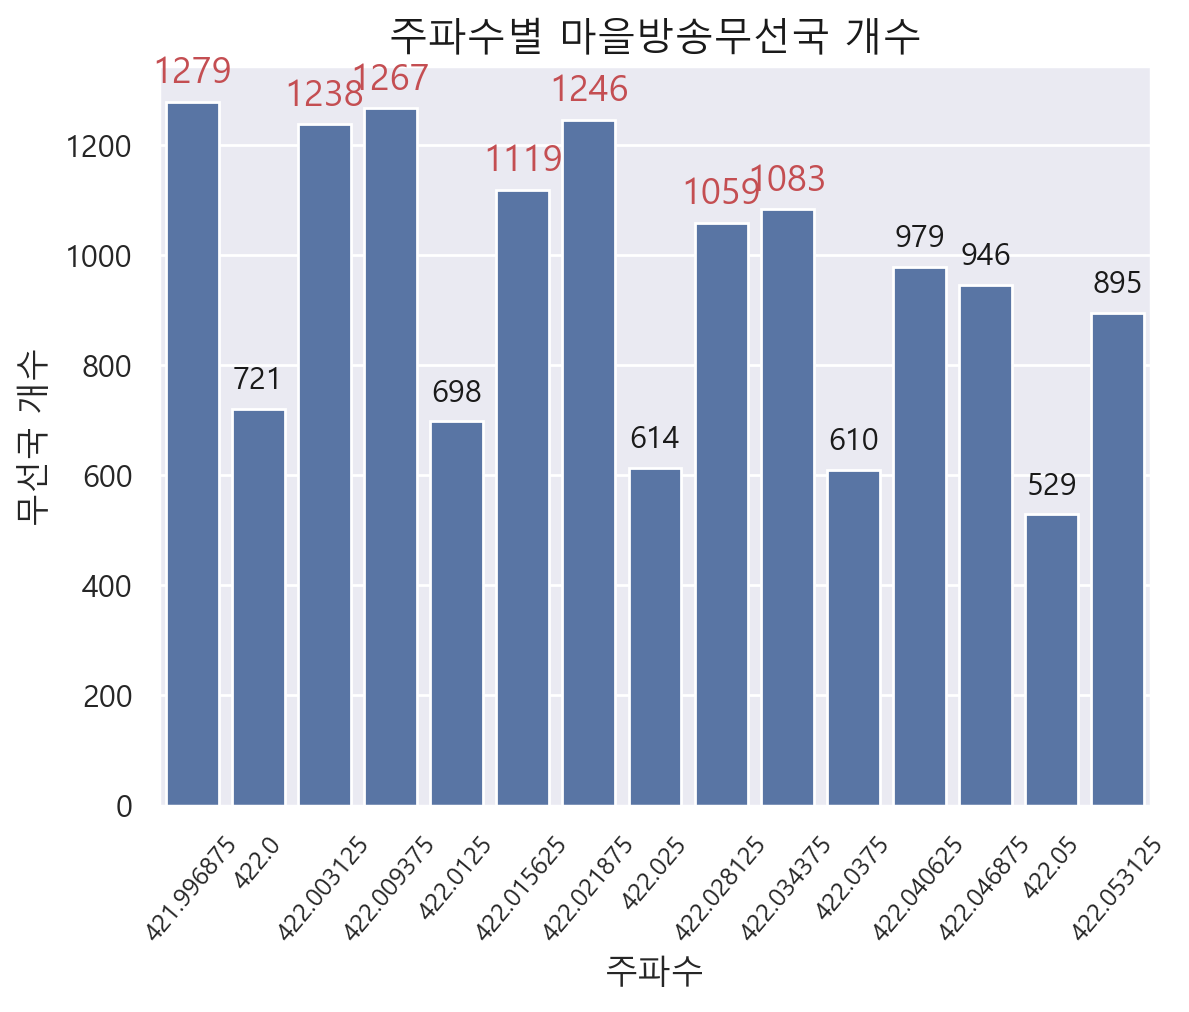

In [215]:
# 막대그래프 생성
ax = sns.barplot(data = data2,
                x= "주파수",
                y= "무선국 개수")

# 제목 추가
ax.set_title(f'주파수별 마을방송무선국 개수', fontsize=14, color='k')

# 막대 위 수치를 보여줌
for idx, p in enumerate(ax.patches) :
    
    # 무선국 개수 1000개 넘는 주파수, 18point 로 표시
    if idx in [0, 2, 3, 5, 6, 8, 9]: # 제일 큰 수치의 인덱스
        ax.annotate("%.0f" % p.get_height(),    # 텍스트
                    (p.get_x() + p.get_width()/2, p.get_height()), # xy, 텍스트 표시 위치
                    ha='center', va='center',   # 텍스트 정렬
                    fontsize=13, color='r',     # 글자크기, 색깔
                    xytext=(0, 10),             # 텍스트가 출력될 위치
                    textcoords='offset points') # 해당 위치가 어떤 좌표계를 따르는지를 지정
        
    # 다른 수치는 검정색, 15point 로 표시
    else : 
        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=11, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
        
# X축 글자크기 12, 45도 회전
plt.xticks(fontsize=9, rotation=50)
# png파일로 저장
plt.savefig('주파수별무선국개수.png', dpi = 400, bbox_inches='tight')
plt.show()

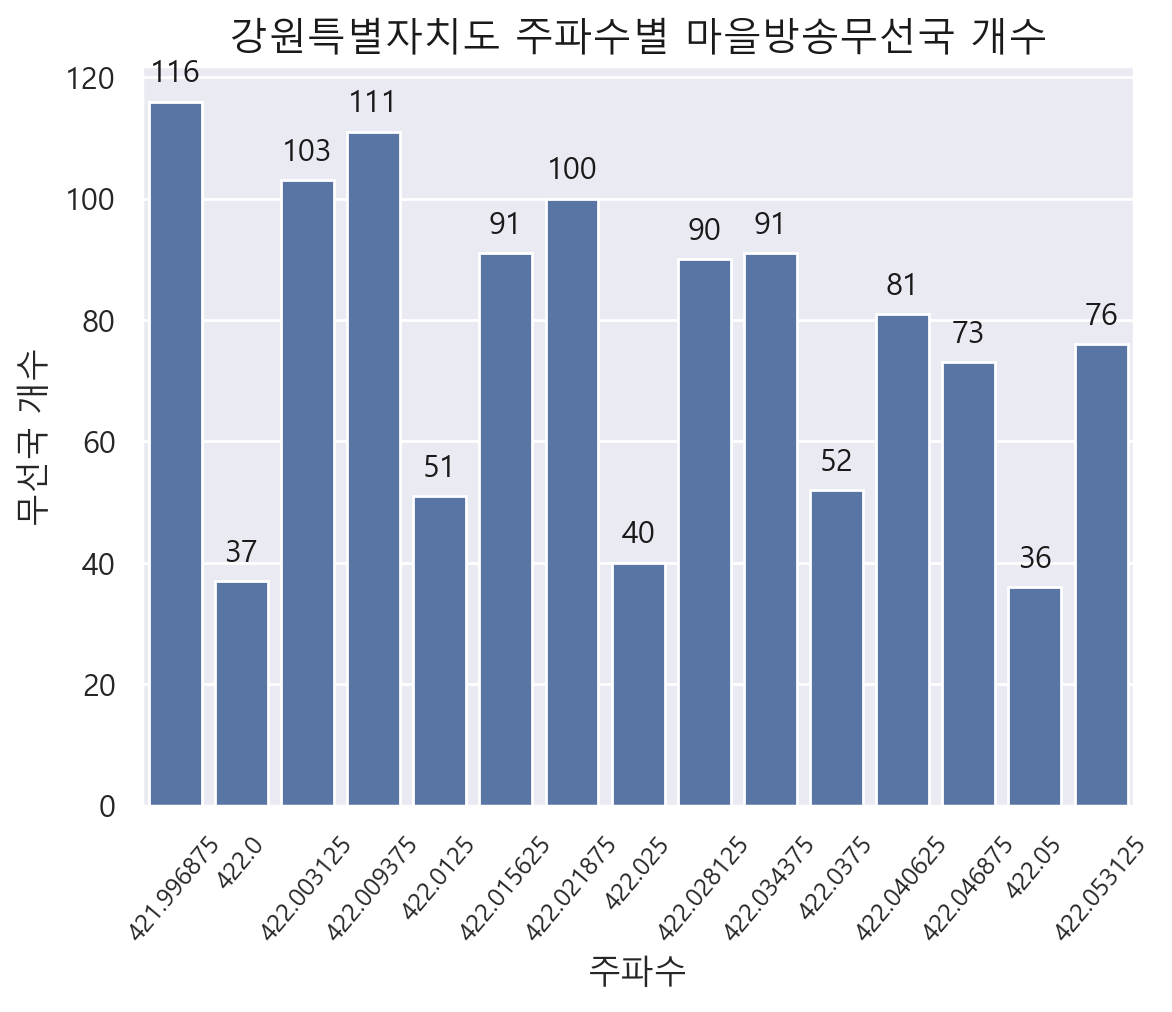

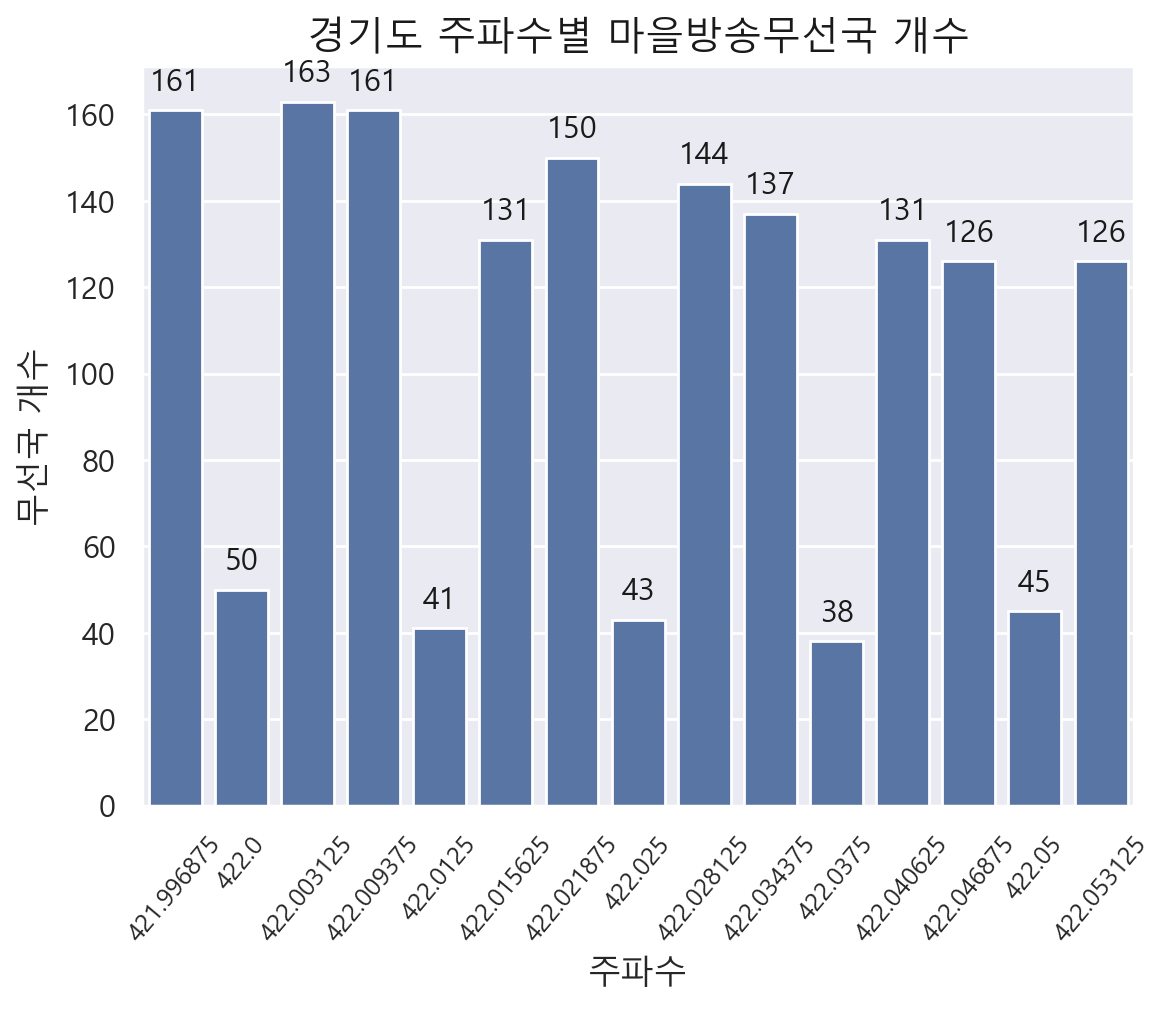

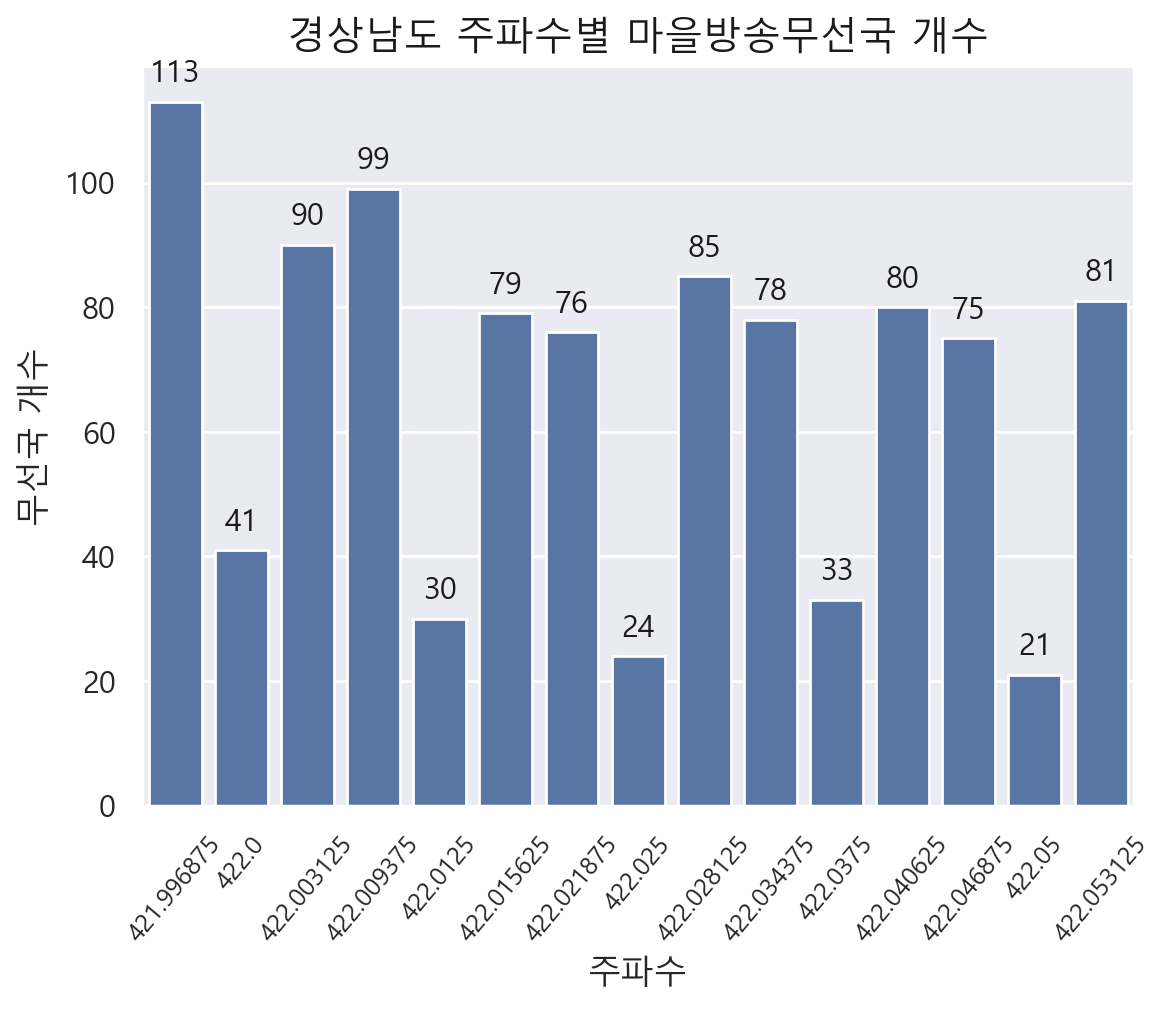

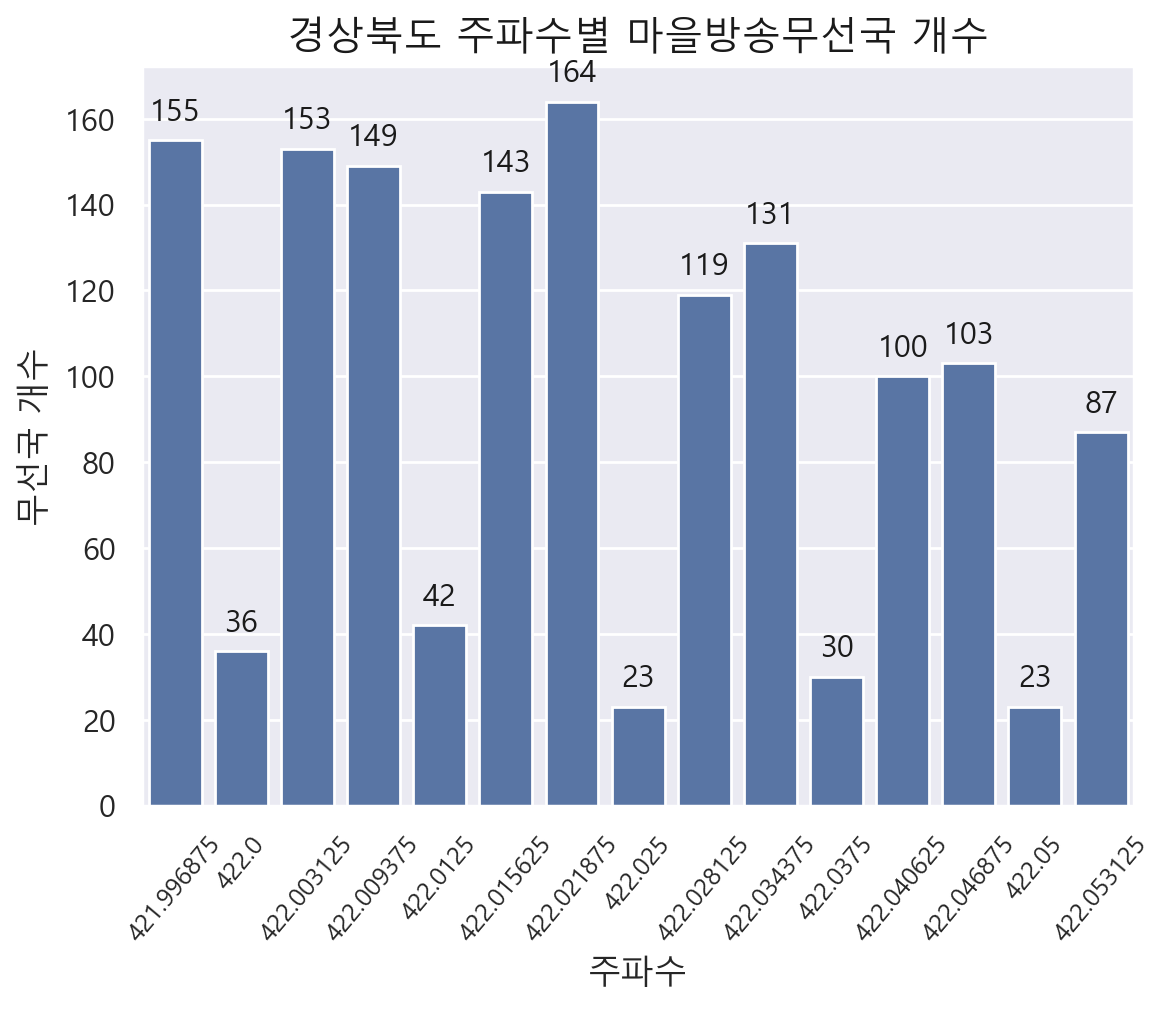

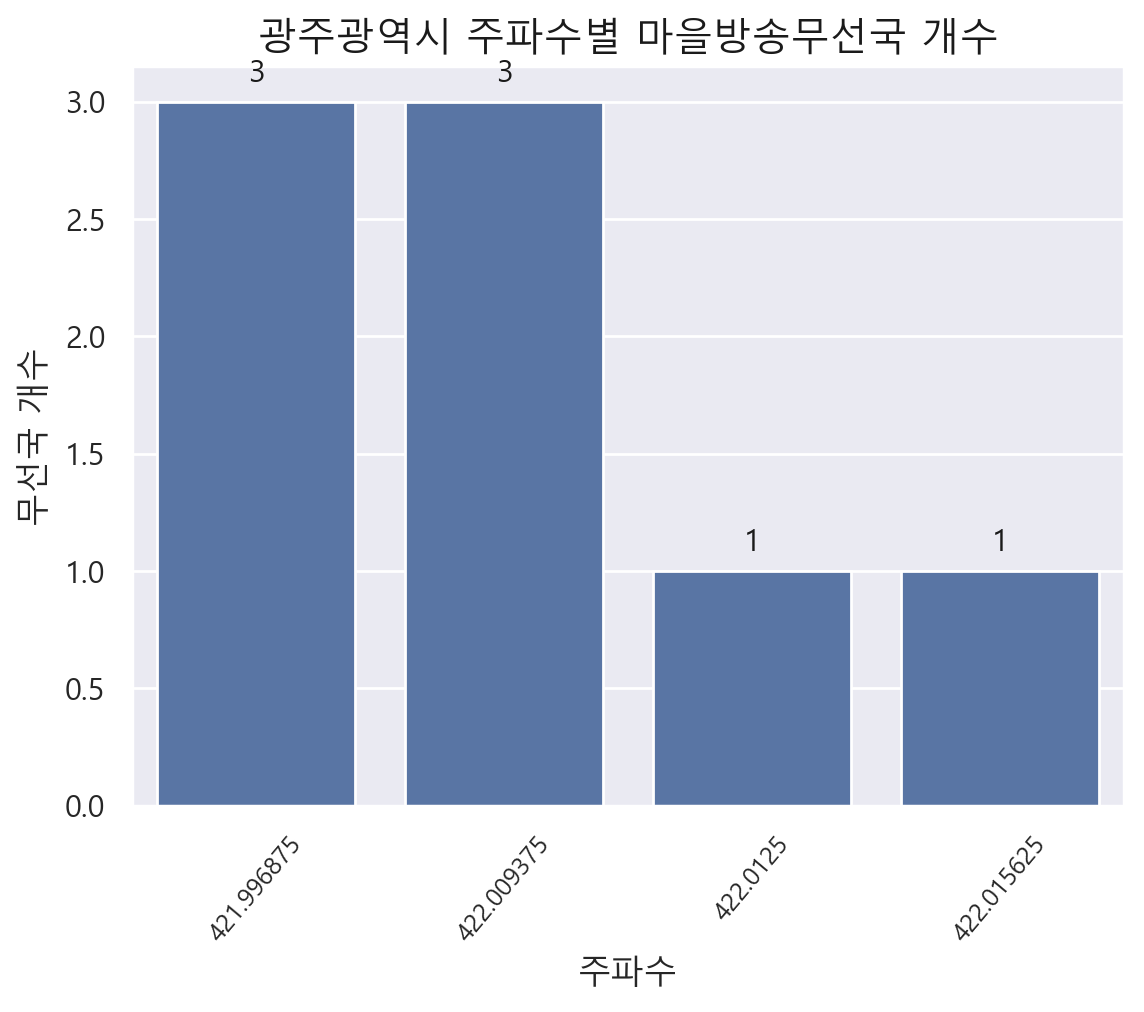

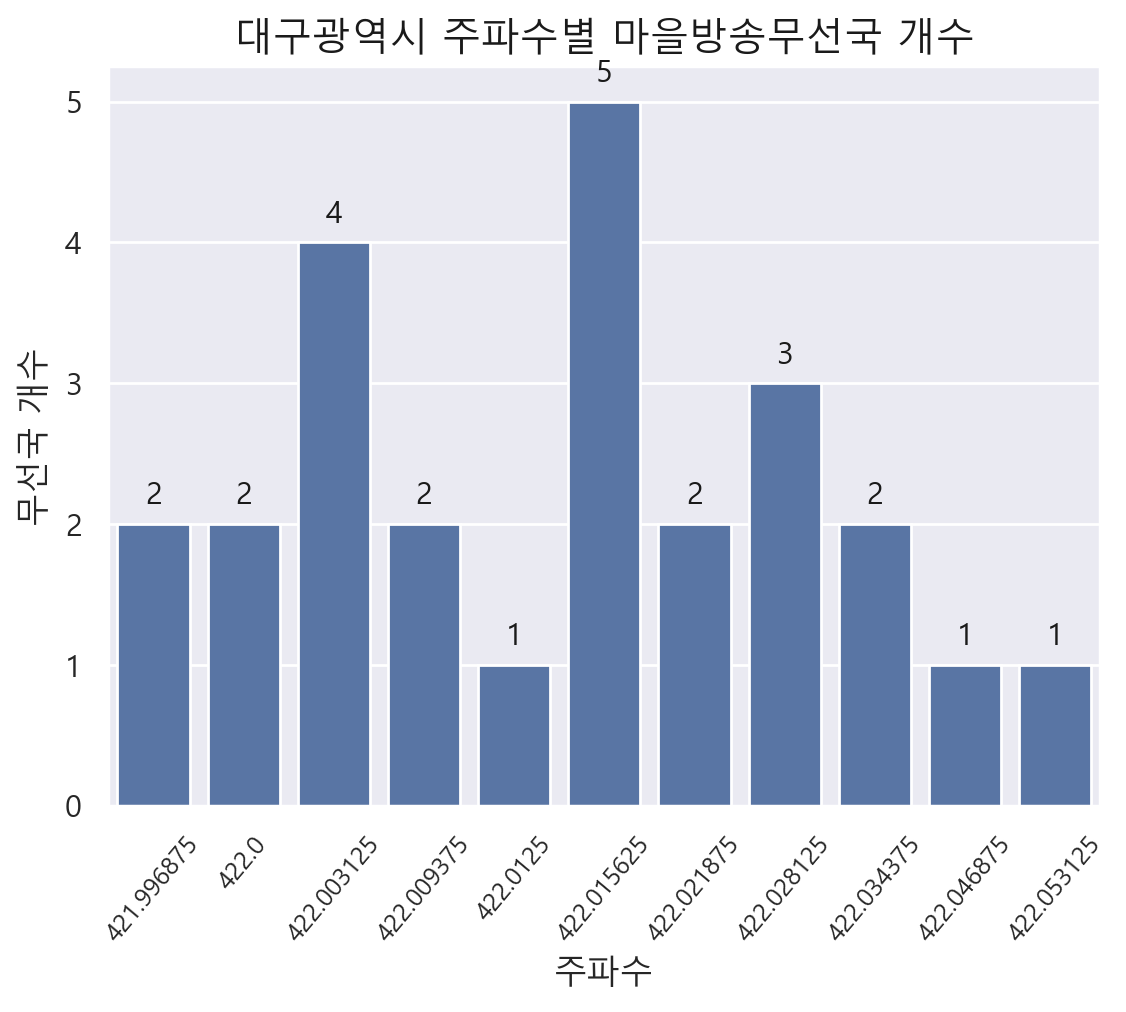

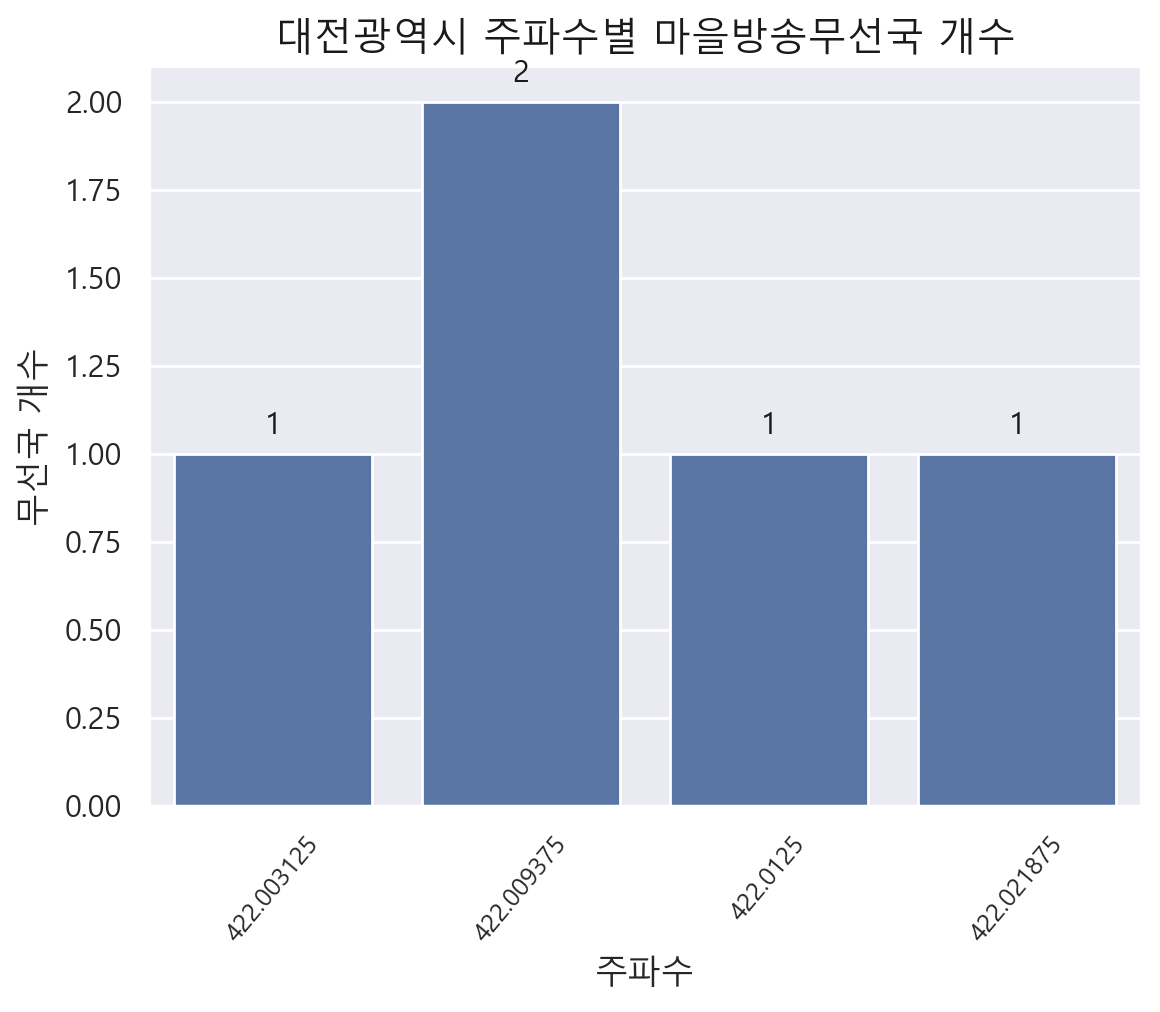

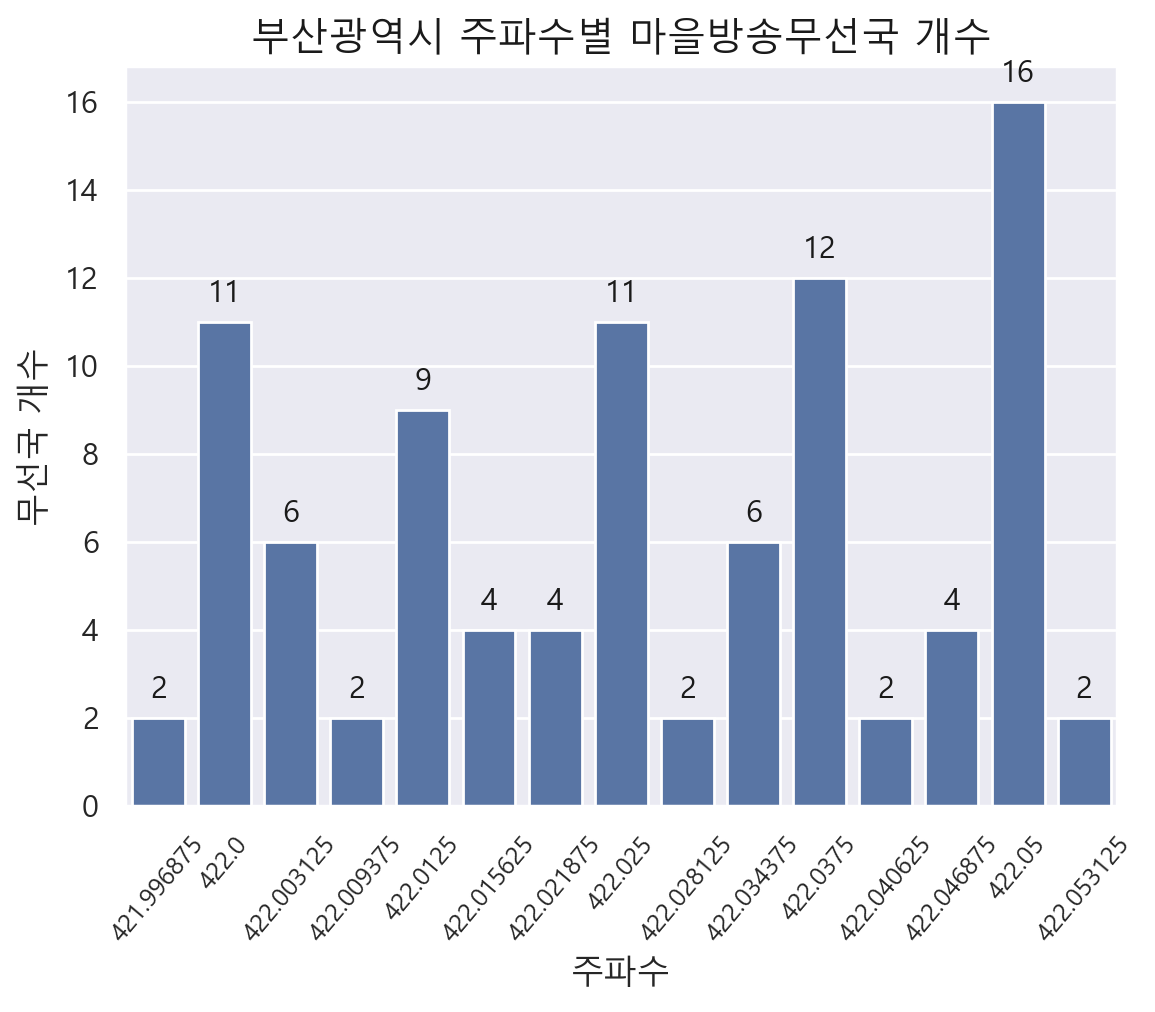

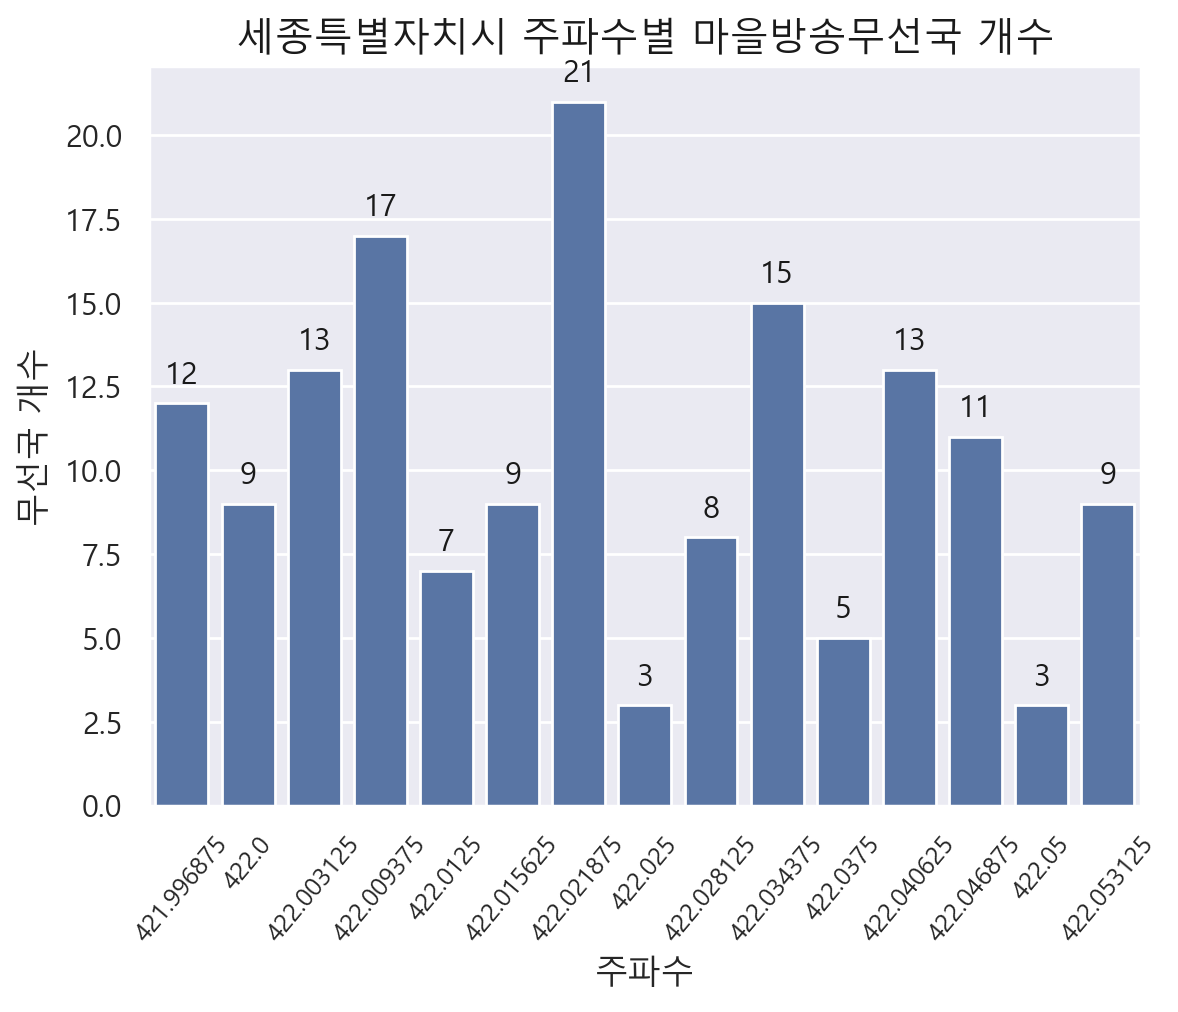

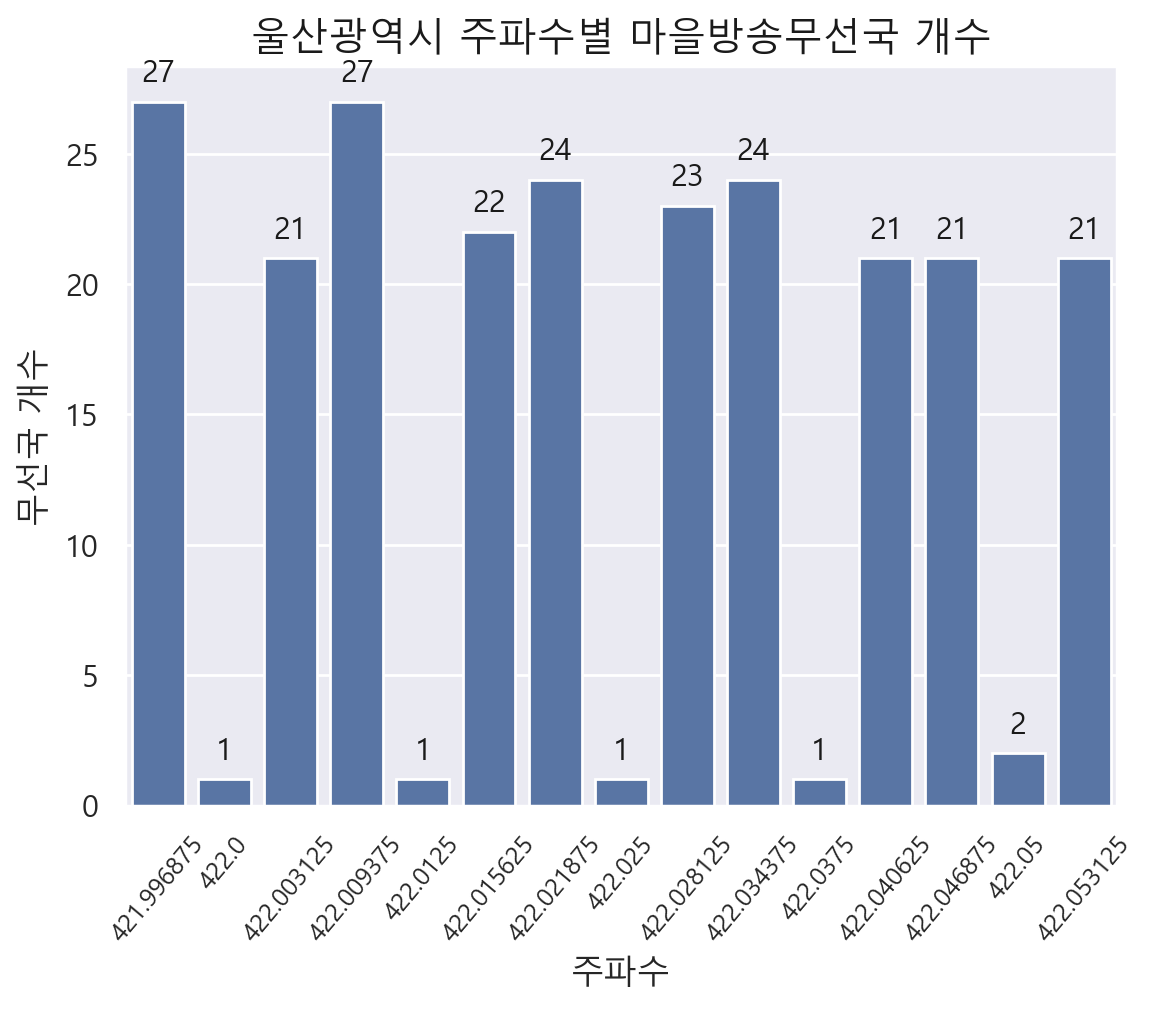

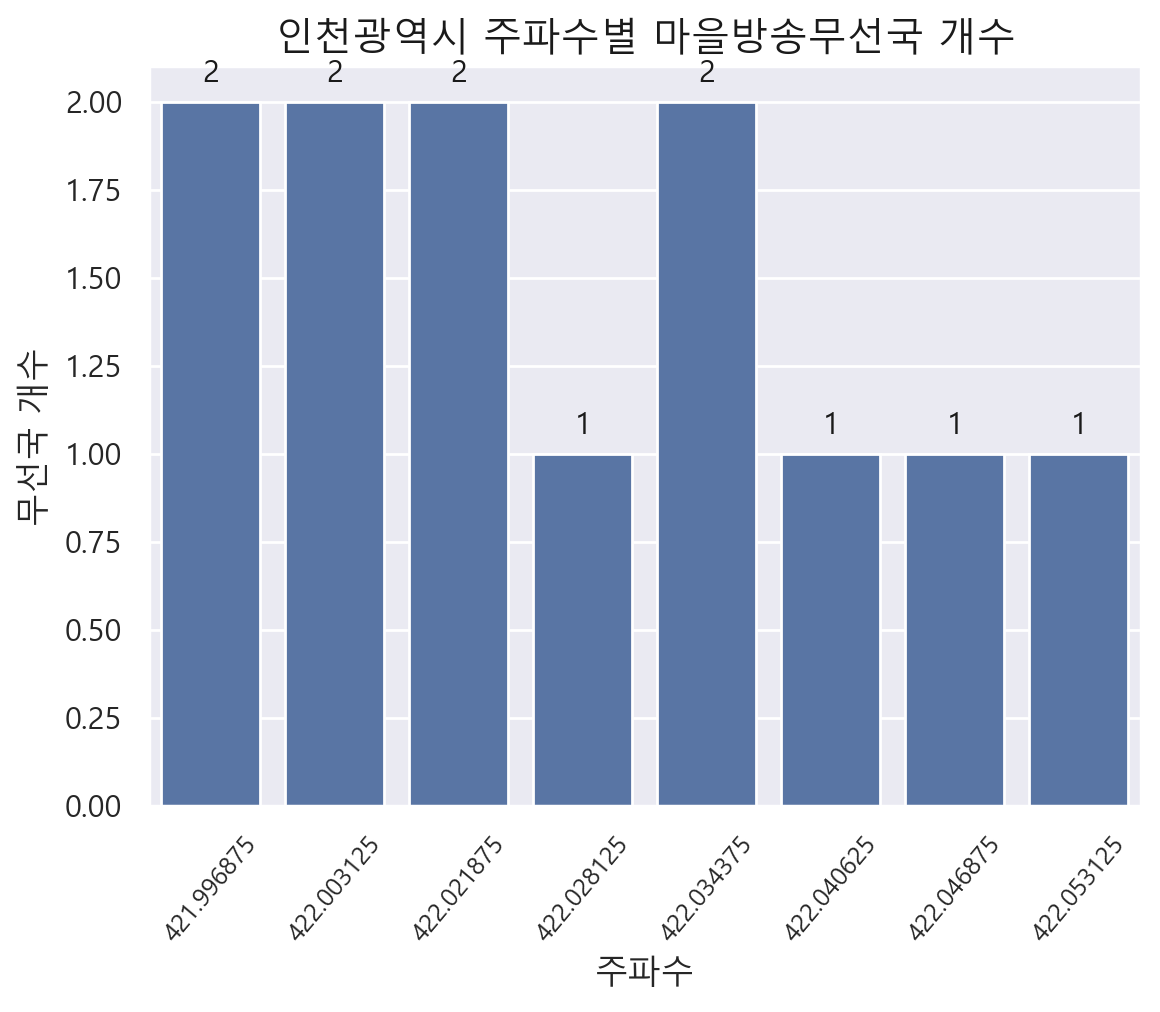

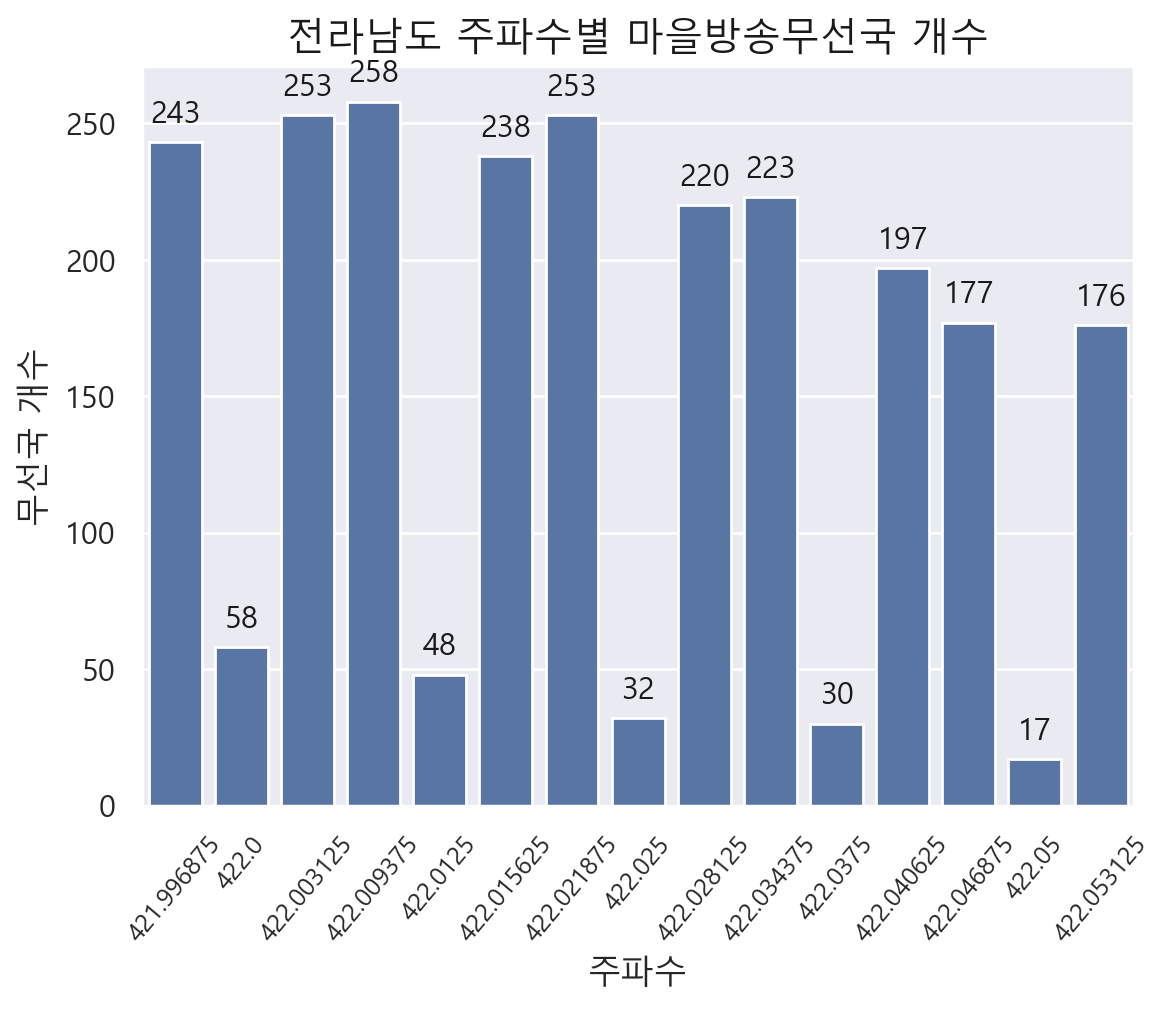

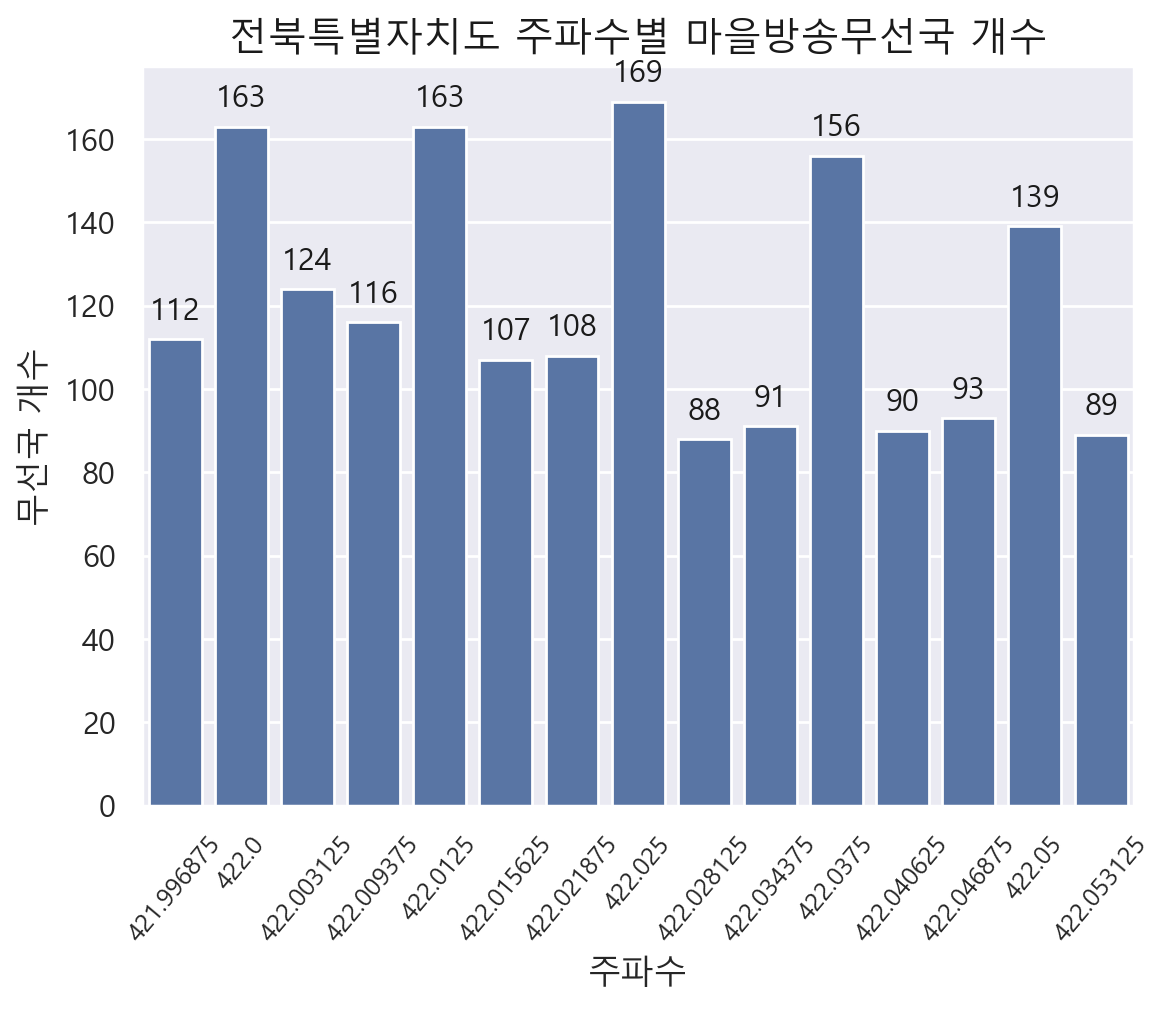

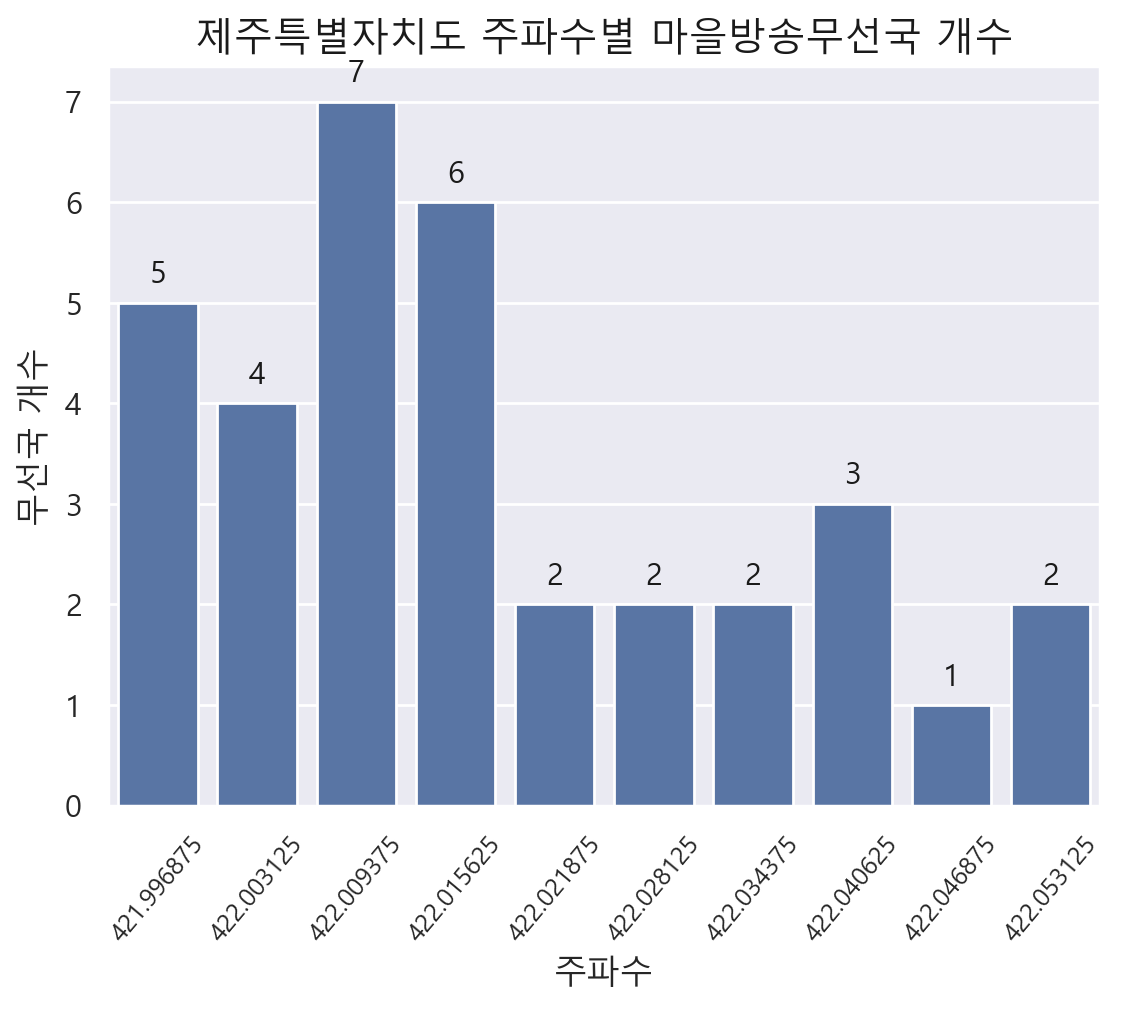

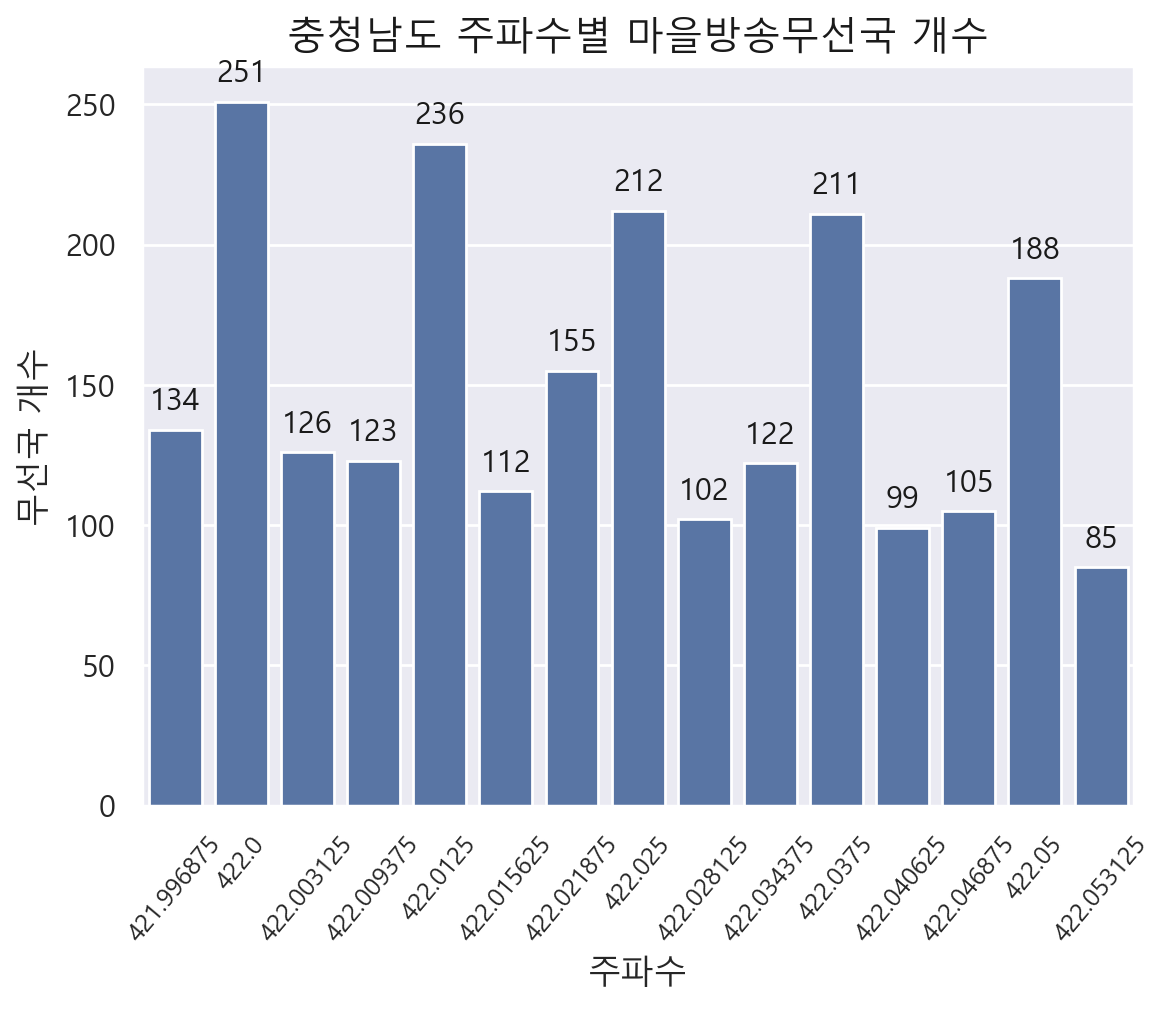

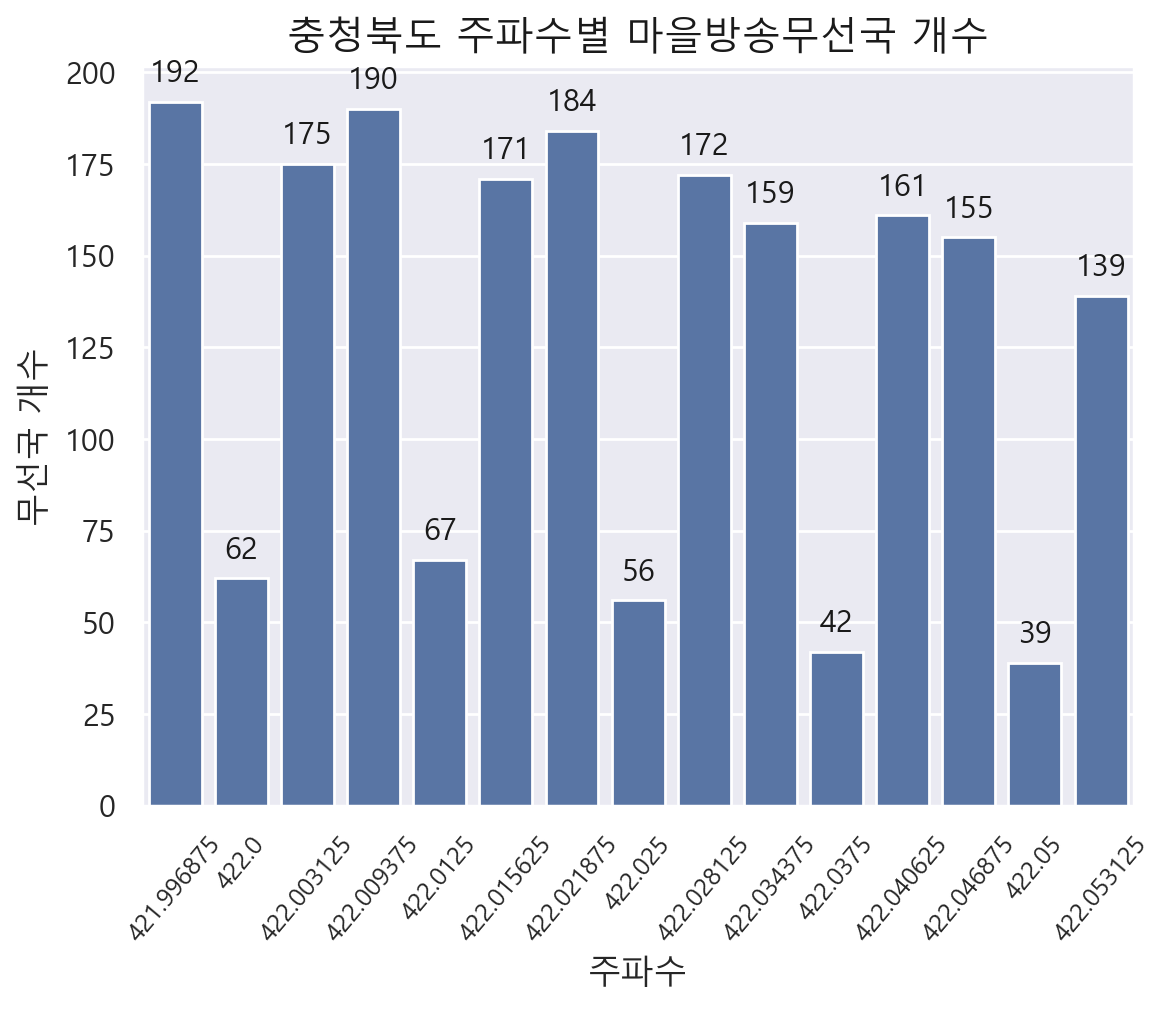

In [211]:
# 각 시도별 주파수 분포 시각화
for idx, sido in enumerate(np.unique(df['시도'])):
    
    tmp = df.loc[df['시도'] == sido, :]
    tmp_data = tmp.groupby(by = ['주파수'], as_index=False)[['허가번호']].count()
    tmp_data.rename(columns={'허가번호' : '무선국 개수'}, inplace=True)
    tmp_data = tmp_data.sort_values(by = '주파수', ascending = True)

    file_name = '주파수별무선국개수_'+str(sido)+'.png'

    # 막대그래프 생성
    ax = sns.barplot(data = tmp_data,
                    x= "주파수",
                    y= "무선국 개수")

    # 제목 추가: sido 값 사용
    ax.set_title(f'{sido} 주파수별 마을방송무선국 개수', fontsize=14, color='k')
    
    # 막대 위 수치를 보여줌
    for idx, p in enumerate(ax.patches) :
            
        ax.annotate("%.0f" % p.get_height(), 
                    (p.get_x() + p.get_width()/2, p.get_height()), #
                    ha='center', va='center', 
                    fontsize=11, color='k',
                    xytext=(0, 10),
                    textcoords='offset points')
            
    # X축 글자크기 12, 45도 회전
    plt.xticks(fontsize=9, rotation=50)
    # png파일로 저장
    plt.savefig(file_name, dpi = 400, bbox_inches='tight')
    plt.show()

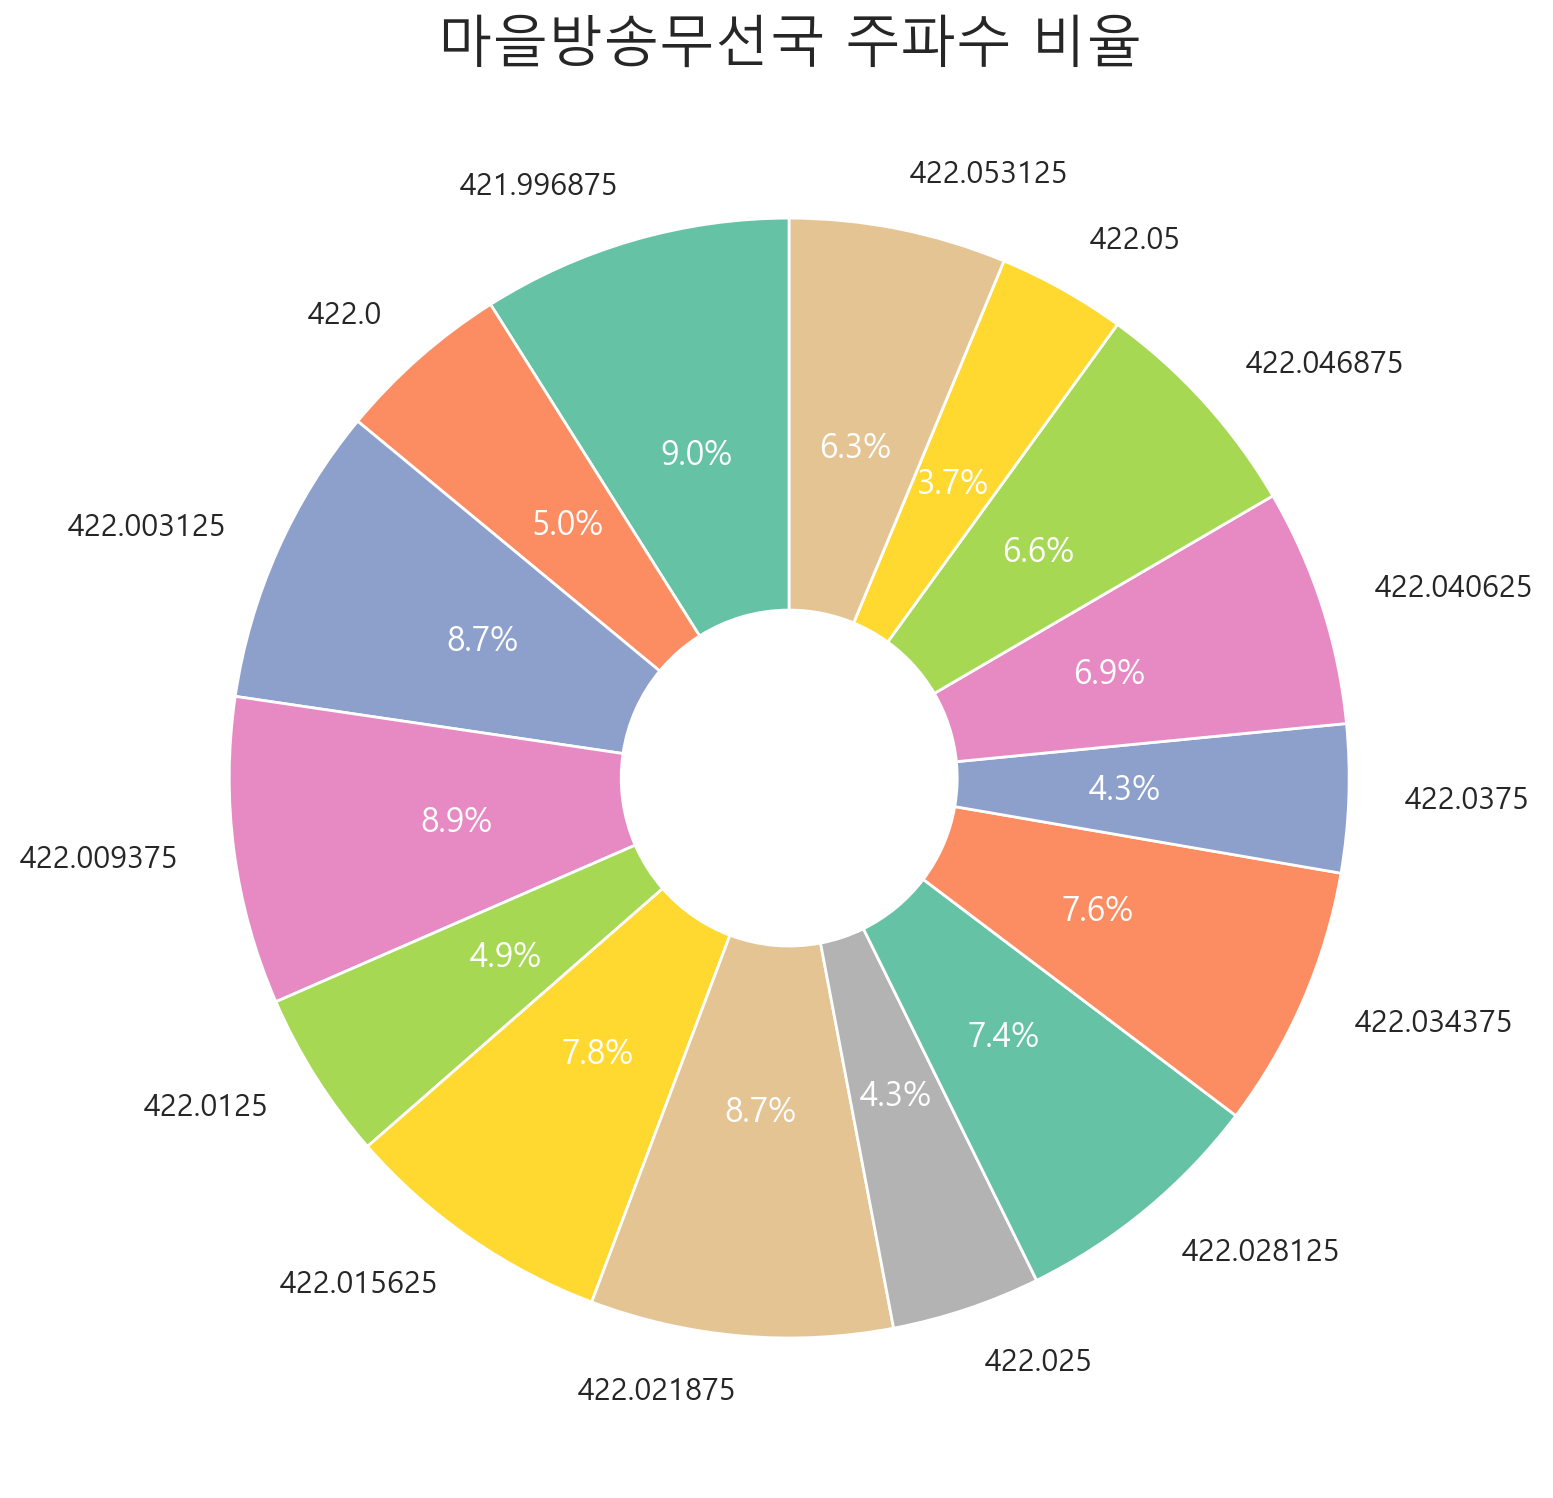

In [81]:
# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8))  # 차트 크기 조정

# 색상을 명확하게 구분하기 위해 colormap 사용
colors = sns.color_palette("Set2", n_colors=len(data2))

# 원형 차트 그리기, 'wedgeprops'로 두께 조정
wedges, texts, autotexts = ax.pie(data2['무선국 개수'], 
                                  labels=data2['주파수'],  # 주파수 라벨은 차트에 표시하지 않음
                                  autopct='%1.1f%%', 
                                  startangle=90,
                                  wedgeprops=dict(width=0.7), 
                                  colors=colors)

# 비율만 보이도록 하기 위한 설정
for text in autotexts:
    text.set_fontsize(12)
    text.set_color('white')  # 비율 숫자는 흰색으로 설정

# 차트 제목
ax.set_title("마을방송무선국 주파수 비율", size = 20)

# 차트 보이기
plt.tight_layout()  # 레이아웃 자동 조정
plt.savefig("주파수별무선국비율.png", dpi = 400, bbox_inches='tight')
plt.show()